## Project Description:

#### General Instruction
- There will be two sets of datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook using pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook(s) or the .py file(s) of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data preparation

In [1]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/motlapranithareddy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#read dataset into jupyter 
reg_train = pd.read_csv("/Users/motlapranithareddy/Downloads/Regression_train.csv")

#create a dataframe out of the dataset 
dfr1 = pd.DataFrame(reg_train)
dfr1.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,0,NaN,5/1/2023,N - NOT INJURED,16:04,NaN,No Data,No Data,No Data,16:26,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,19,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
1,1,19524300.0,5/1/2023,NaN,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2006,37,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
2,2,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2008,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
3,3,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,NaN,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,23,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
4,4,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,24,No Data,No Data,W - WHITE,1 - MALE


In [3]:
#read dataset into jupyter 
reg_test = pd.read_csv("/Users/motlapranithareddy/Downloads/Regression_test.csv")

#create a dataframe out of the dataset 
dfr2 = pd.DataFrame(reg_test)
dfr2.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,0,19896631.0,11/30/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,6 - FOG,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2010,19,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
1,1,19568388.0,5/26/2023,N - NOT INJURED,FRIDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2015,59,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
2,2,19675565.0,7/29/2023,N - NOT INJURED,SATURDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009,41,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
3,3,19636995.0,7/6/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2020,56,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
4,4,19605340.0,6/15/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,31,No Data,97 - NOT APPLICABLE,B - BLACK,1 - MALE


In [4]:
dfr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5259 non-null   object 
 4   Crash Time                          5376 non-null   object 
 5   Day of Week                         5264 non-null   object 
 6   Nearest Trauma Center Distance      5266 non-null   object 
 7   Time Arrived                        5283 non-null   object 
 8   Time Notified                       5264 non-null   object 
 9   Time Roadway Cleared                5376 non-null   object 
 10  Weather Condition                   5376 non-null   object 
 11  Autonomous Level Engaged            5273 no

In [5]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      928 non-null    object 
 4   Day of Week                         924 non-null    object 
 5   Nearest Trauma Center Distance      927 non-null    object 
 6   Time Arrived                        934 non-null    object 
 7   Time Notified                       930 non-null    object 
 8   Weather Condition                   948 non-null    object 
 9   Autonomous Level Engaged            929 non-null    object 
 10  Autonomous Unit - Reported          926 non-null    object 
 11  Vehicle Damage Rating 1 - Severity  928 non-n

In [6]:
dfr1 = dfr1.drop(columns=['Unnamed: 0']) 
dfr2 = dfr2.drop(columns=['Unnamed: 0']) 

In [7]:
dfr1.isna().sum()

Crash ID                              110
Crash Date                            109
Crash Severity                        117
Crash Time                              0
Day of Week                           112
Nearest Trauma Center Distance        110
Time Arrived                           93
Time Notified                         112
Time Roadway Cleared                    0
Weather Condition                       0
Autonomous Level Engaged              103
Autonomous Unit - Reported            102
Vehicle Damage Rating 1 - Severity    107
Vehicle Model Year                    103
Person Age                            119
Person Alcohol Result                  91
Person Drug Test Result               127
Person Ethnicity                        0
Person Gender                         108
dtype: int64

In [8]:
dfr2.isna().sum()

Crash ID                              18
Crash Date                            29
Crash Severity                        20
Day of Week                           24
Nearest Trauma Center Distance        21
Time Arrived                          14
Time Notified                         18
Weather Condition                      0
Autonomous Level Engaged              19
Autonomous Unit - Reported            22
Vehicle Damage Rating 1 - Severity    20
Vehicle Model Year                    12
Person Age                            19
Person Alcohol Result                 15
Person Drug Test Result               17
Person Ethnicity                       0
Person Gender                         22
dtype: int64

In [9]:
dfr1['Crash Time'] = pd.to_datetime(dfr1['Crash Time'])
dfr1['Time Roadway Cleared'] = pd.to_datetime(dfr1['Time Roadway Cleared'])

#Subtract "Crash Time" from "Time Roadway Cleared" for y value
dfr1['y'] = dfr1['Time Roadway Cleared'] - dfr1['Crash Time']
dfr1['y'] = dfr1['y'].dt.total_seconds() / 60

/var/folders/65/qwbps211699_xjjb_4x3q8740000gn/T/ipykernel_45715/3346762518.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfr1['Crash Time'] = pd.to_datetime(dfr1['Crash Time'])
/var/folders/65/qwbps211699_xjjb_4x3q8740000gn/T/ipykernel_45715/3346762518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfr1['Time Roadway Cleared'] = pd.to_datetime(dfr1['Time Roadway Cleared'])


In [10]:
dfr1 = dfr1.drop(columns=['Crash Time']) 
dfr1 = dfr1.drop(columns=['Time Roadway Cleared']) 

In [11]:
#Dropping the columns which are not needed
columns_to_drop = ['Crash ID','Crash Date','Time Arrived','Time Notified','Person Ethnicity','Person Drug Test Result','Person Alcohol Result']
dfr1.drop(columns_to_drop, axis=1, inplace=True)
dfr1.info()
dfr2.drop(columns_to_drop, axis=1, inplace=True)
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5259 non-null   object 
 1   Day of Week                         5264 non-null   object 
 2   Nearest Trauma Center Distance      5266 non-null   object 
 3   Weather Condition                   5376 non-null   object 
 4   Autonomous Level Engaged            5273 non-null   object 
 5   Autonomous Unit - Reported          5274 non-null   object 
 6   Vehicle Damage Rating 1 - Severity  5269 non-null   object 
 7   Vehicle Model Year                  5273 non-null   object 
 8   Person Age                          5257 non-null   object 
 9   Person Gender                       5268 non-null   object 
 10  y                                   5376 non-null   float64
dtypes: float64(1), object(10)
memory usage: 462

In [12]:
dfr1['Person Gender'] = dfr1['Person Gender'].replace("99 - UNKNOWN","1 - MALE")
dfr1.fillna({'Person Gender':'1 - MALE'},inplace = True)
dfr1['Person Gender'] = dfr1['Person Gender'].map({'1 - MALE':1,'2 - FEMALE':0})
dfr2['Person Gender'] = dfr2['Person Gender'].replace("99 - UNKNOWN","1 - MALE")
dfr2.fillna({'Person Gender':'1 - MALE'},inplace = True)
dfr2['Person Gender'] = dfr2['Person Gender'].map({'1 - MALE':1,'2 - FEMALE':0})

In [13]:
#Replace any occurrences of "99 - UNKNOWN" with "N - NOT INJURED" in the "Crash Severity" column in dfr1
print(dfr1["Crash Severity"].value_counts())
most_frequent = dfr1["Crash Severity"].mode()
dfr1["Crash Severity"] = dfr1["Crash Severity"].replace("99 - UNKNOWN", "N - NOT INJURED")
print(dfr1["Crash Severity"].value_counts())
dfr1.fillna({'Crash Severity': 'N - NOT INJURED'}, inplace = True)

Crash Severity
N - NOT INJURED                 3459
B - SUSPECTED MINOR INJURY       796
C - POSSIBLE INJURY              733
99 - UNKNOWN                     149
A - SUSPECTED SERIOUS INJURY     101
K - FATAL INJURY                  21
Name: count, dtype: int64
Crash Severity
N - NOT INJURED                 3608
B - SUSPECTED MINOR INJURY       796
C - POSSIBLE INJURY              733
A - SUSPECTED SERIOUS INJURY     101
K - FATAL INJURY                  21
Name: count, dtype: int64


In [14]:
# Create dummy variables for the "Crash Severity" column using one-hot encoding and prefix "Crash" in dfr1
crash_encode = pd.get_dummies(dfr1["Crash Severity"], prefix = "Crash")
crash_encode = crash_encode.astype(int)
dfr1[crash_encode.columns] = crash_encode 
print(crash_encode.head())

   Crash_A - SUSPECTED SERIOUS INJURY  Crash_B - SUSPECTED MINOR INJURY  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Crash_C - POSSIBLE INJURY  Crash_K - FATAL INJURY  Crash_N - NOT INJURED  
0                          0                       0                      1  
1                          0                       0                      1  
2                          1                       0                      0  
3                          1                       0                      0  
4                          1                       0                      0  


In [15]:
#Replace any occurrences of "99 - UNKNOWN" with "N - NOT INJURED" in the "Crash Severity" column in dfr2
print(dfr2["Crash Severity"].value_counts())
most_frequent = dfr2["Crash Severity"].mode()
dfr2["Crash Severity"] = dfr2["Crash Severity"].replace("99 - UNKNOWN", "N - NOT INJURED")
print(dfr2["Crash Severity"].value_counts())
dfr2.fillna({'Crash Severity': 'N - NOT INJURED'}, inplace = True)

Crash Severity
N - NOT INJURED                 616
C - POSSIBLE INJURY             136
B - SUSPECTED MINOR INJURY      120
99 - UNKNOWN                     27
A - SUSPECTED SERIOUS INJURY     27
K - FATAL INJURY                  2
Name: count, dtype: int64
Crash Severity
N - NOT INJURED                 643
C - POSSIBLE INJURY             136
B - SUSPECTED MINOR INJURY      120
A - SUSPECTED SERIOUS INJURY     27
K - FATAL INJURY                  2
Name: count, dtype: int64


In [16]:
#Create dummy variables for the "Crash Severity" column using one-hot encoding and prefix "Crash"in dfr2
crash_encode = pd.get_dummies(dfr2["Crash Severity"], prefix = "Crash")
crash_encode = crash_encode.astype(int)
dfr2[crash_encode.columns] = crash_encode
print(crash_encode.head())

   Crash_A - SUSPECTED SERIOUS INJURY  Crash_B - SUSPECTED MINOR INJURY  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Crash_C - POSSIBLE INJURY  Crash_K - FATAL INJURY  Crash_N - NOT INJURED  
0                          0                       0                      1  
1                          0                       0                      1  
2                          0                       0                      1  
3                          0                       0                      1  
4                          0                       0                      1  


In [17]:
dfr1.fillna({'Day of Week': 'FRIDAY'}, inplace = True)
dfr2.fillna({'Day of Week': 'FRIDAY'}, inplace = True)
day_mapping = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}
dfr1['Day of Week'] = dfr1['Day of Week'].map(day_mapping)
dfr2['Day of Week'] = dfr2['Day of Week'].map(day_mapping)

In [18]:
dfr1.fillna({'Autonomous Level Engaged':'0 - NO AUTOMATION'},inplace = True)
dfr1['Autonomous Level Engaged'].value_counts()
dfr1['Autonomous Level Engaged'] = dfr1['Autonomous Level Engaged'].map({'0 - NO AUTOMATION':1,'99 - UNKNOWN':0})
dfr2.fillna({'Autonomous Level Engaged':'0 - NO AUTOMATION'},inplace = True)
dfr2['Autonomous Level Engaged'].value_counts()
dfr2['Autonomous Level Engaged'] = dfr2['Autonomous Level Engaged'].map({'0 - NO AUTOMATION':1,'99 - UNKNOWN':0})

In [19]:
dfr1['Autonomous Unit - Reported'].value_counts()
dfr1.fillna({'Autonomous Unit - Reported':'2 - NO'},inplace = True)
dfr1['Autonomous Unit - Reported'] = dfr1['Autonomous Unit - Reported'].map({'2 - NO':1,'99 - UNKNOWN':0})
dfr2['Autonomous Unit - Reported'].value_counts()
dfr2.fillna({'Autonomous Unit - Reported':'2 - NO'},inplace = True)
dfr2['Autonomous Unit - Reported'] = dfr2['Autonomous Unit - Reported'].map({'2 - NO':1,'99 - UNKNOWN':0})

In [20]:
dfr1['Vehicle Damage Rating 1 - Severity'].value_counts()

dfr1.fillna({'Vehicle Damage Rating 1 - Severity':'0 - NO DAMAGE'},inplace=True)
dfr1["Vehicle Damage Rating 1 - Severity"] = dfr1["Vehicle Damage Rating 1 - Severity"].replace("No Data", "0 - NO DAMAGE")


Vehicle_Damage= {'0 - NO DAMAGE': 0, '1 - DAMAGED 1 MINIMUM': 1, '2 - DAMAGED 2': 2,
                    '3 - DAMAGED 3': 3, '4 - DAMAGED 4': 4, '5 - DAMAGED 5': 5,'6 - DAMAGED 6':6,'7 - DAMAGED 7 HIGHEST':7}

dfr1['Vehicle Damage Rating 1 - Severity'] = dfr1['Vehicle Damage Rating 1 - Severity'].map(Vehicle_Damage)
dfr2['Vehicle Damage Rating 1 - Severity'].value_counts()

dfr2.fillna({'Vehicle Damage Rating 1 - Severity':'0 - NO DAMAGE'},inplace=True)
dfr2["Vehicle Damage Rating 1 - Severity"] = dfr2["Vehicle Damage Rating 1 - Severity"].replace("No Data", "0 - NO DAMAGE")


Vehicle_Damage= {'0 - NO DAMAGE': 0, '1 - DAMAGED 1 MINIMUM': 1, '2 - DAMAGED 2': 2,
                    '3 - DAMAGED 3': 3, '4 - DAMAGED 4': 4, '5 - DAMAGED 5': 5,'6 - DAMAGED 6':6,'7 - DAMAGED 7 HIGHEST':7}

dfr2['Vehicle Damage Rating 1 - Severity'] = dfr2['Vehicle Damage Rating 1 - Severity'].map(Vehicle_Damage)

In [21]:
print(dfr1["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR                            4304
2 - CLOUDY                            531
3 - RAIN                              394
Unknown                                49
No Data                                46
99 - UNKNOWN                           27
6 - FOG                                11
5 - SNOW                                6
4 - SLEET/HAIL                          4
98 - OTHER (EXPLAIN IN NARRATIVE)       4
Name: count, dtype: int64


In [22]:
# Replace any occurrences of "99 - UNKNOWN" with "1 - CLEAR" in the "Weather Condition" column in dfr1
dfr1["Weather Condition"] = dfr1["Weather Condition"].replace("99 - UNKNOWN", "1 - CLEAR")
#dfr1["Weather Condition"] = dfr1["Weather Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - CLEAR")
dfr1["Weather Condition"] = dfr1["Weather Condition"].replace("Unknown", "1 - CLEAR")
dfr1["Weather Condition"] = dfr1["Weather Condition"].replace("No Data", "1 - CLEAR")
dfr1["Weather Condition"] = dfr1["Weather Condition"].fillna("1 - CLEAR")

In [23]:
# Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather" in dfr2
# Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather" in dfr1
weather_encode = pd.get_dummies(dfr1["Weather Condition"], prefix = "Weather")
weather_encode = weather_encode.astype(int)
dfr1[weather_encode.columns] = weather_encode
print(weather_encode.head())

   Weather_1 - CLEAR  Weather_2 - CLOUDY  Weather_3 - RAIN  \
0                  1                   0                 0   
1                  1                   0                 0   
2                  1                   0                 0   
3                  1                   0                 0   
4                  1                   0                 0   

   Weather_4 - SLEET/HAIL  Weather_5 - SNOW  Weather_6 - FOG  \
0                       0                 0                0   
1                       0                 0                0   
2                       0                 0                0   
3                       0                 0                0   
4                       0                 0                0   

   Weather_98 - OTHER (EXPLAIN IN NARRATIVE)  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4      

In [24]:
print(dfr2["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR                            743
2 - CLOUDY                           101
3 - RAIN                              72
No Data                               12
Unknown                               10
99 - UNKNOWN                           6
6 - FOG                                3
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: count, dtype: int64


In [25]:
#Replace any occurrences of "99 - UNKNOWN" with "1 - CLEAR" in the "Weather Condition" column in dfr2
dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("99 - UNKNOWN", "1 - CLEAR")
#dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - CLEAR")
dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("Unknown", "1 - CLEAR")
dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("No Data", "1 - CLEAR")

In [26]:
#Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather" in dfr2
weather_encode = pd.get_dummies(dfr2["Weather Condition"], prefix = "Weather")
weather_encode = weather_encode.astype(int)
dfr2[weather_encode.columns] = weather_encode
print(weather_encode.head())

   Weather_1 - CLEAR  Weather_2 - CLOUDY  Weather_3 - RAIN  Weather_6 - FOG  \
0                  0                   0                 0                1   
1                  1                   0                 0                0   
2                  1                   0                 0                0   
3                  1                   0                 0                0   
4                  1                   0                 0                0   

   Weather_98 - OTHER (EXPLAIN IN NARRATIVE)  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  


In [27]:
# Adding columns with value 0 that are present in train but not in test
dfr2['Weather_4 - SLEET/HAIL'] = 0 
dfr2['Weather_5 - SNOW'] = 0

In [28]:
#Dropping the unnecessary columns
dfr1.drop(columns = ["Crash Severity"], inplace = True)
dfr2.drop(columns = ["Crash Severity"], inplace = True)
dfr1.drop(columns = ["Weather Condition"], inplace = True)
dfr2.drop(columns = ["Weather Condition"], inplace = True)
dfr1.drop(columns = ["Vehicle Model Year"], inplace = True)
dfr2.drop(columns = ["Vehicle Model Year"], inplace = True)
dfr1.drop(columns = ["Nearest Trauma Center Distance"], inplace = True)
dfr2.drop(columns = ["Nearest Trauma Center Distance"], inplace = True)
dfr1.drop(columns = ["Person Age"], inplace = True)
dfr2.drop(columns = ["Person Age"], inplace = True)

In [29]:
dfr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Day of Week                                5376 non-null   int64  
 1   Autonomous Level Engaged                   5376 non-null   int64  
 2   Autonomous Unit - Reported                 5376 non-null   int64  
 3   Vehicle Damage Rating 1 - Severity         5376 non-null   int64  
 4   Person Gender                              5376 non-null   int64  
 5   y                                          5376 non-null   float64
 6   Crash_A - SUSPECTED SERIOUS INJURY         5376 non-null   int64  
 7   Crash_B - SUSPECTED MINOR INJURY           5376 non-null   int64  
 8   Crash_C - POSSIBLE INJURY                  5376 non-null   int64  
 9   Crash_K - FATAL INJURY                     5376 non-null   int64  
 10  Crash_N - NOT INJURED   

In [30]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Day of Week                                948 non-null    int64
 1   Autonomous Level Engaged                   948 non-null    int64
 2   Autonomous Unit - Reported                 948 non-null    int64
 3   Vehicle Damage Rating 1 - Severity         948 non-null    int64
 4   Person Gender                              948 non-null    int64
 5   Crash_A - SUSPECTED SERIOUS INJURY         948 non-null    int64
 6   Crash_B - SUSPECTED MINOR INJURY           948 non-null    int64
 7   Crash_C - POSSIBLE INJURY                  948 non-null    int64
 8   Crash_K - FATAL INJURY                     948 non-null    int64
 9   Crash_N - NOT INJURED                      948 non-null    int64
 10  Weather_1 - CLEAR                          948 non

## Clustering for regression_train (dfr1) dataset

In [31]:
from sklearn.preprocessing import StandardScaler
import seaborn as sb
X_dfr1 = dfr1.drop('y', axis = 1)
Y = dfr1['y']
print("X shape:", X_dfr1.shape)
print("Y shape:", Y.shape)

scaler = StandardScaler()
scaler.fit(X_dfr1)
X_scaled_dfr1 = scaler.transform(X_dfr1)
X_scaled_dfr1 = pd.DataFrame(X_scaled_dfr1, columns = X_dfr1.columns)

X shape: (5376, 17)
Y shape: (5376,)


In [32]:
#scaling for regression test dataset
X_dfr2 = dfr2
scaler = StandardScaler()
scaler.fit(X_dfr2)
X_scaled_dfr2 = scaler.transform(X_dfr2)
X_scaled_dfr2 = pd.DataFrame(X_scaled_dfr2, columns = X_dfr2.columns)

Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [34]:
model = AgglomerativeClustering(distance_threshold = 120, n_clusters = None, 
                                linkage = 'ward')

#Training the model
model = model.fit(X_scaled_dfr1)
print(model.n_clusters_)
silhouette_score(X_scaled_dfr1, model.labels_)

4


0.33262255909588984

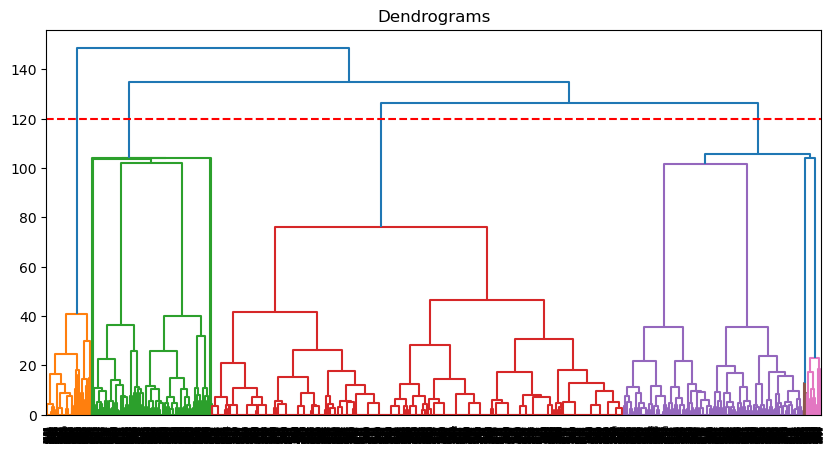

In [35]:
#Plotting the dendogram to get the distance threshold for our clustering model
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (10,5))
plt.title("Dendrograms")
dendrogram(linkage(X_scaled_dfr1, method = 'ward'))
plt.axhline(y = 120, c = 'r', linestyle = '--')

plt.show()

In [36]:
#Performing the clustering with our n clusters and ward linkage
model = AgglomerativeClustering(n_clusters = 4, linkage='ward')
#Training the model
model = model.fit(X_scaled_dfr1)
model.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [37]:
#silhoutte score for Agglomerative clustering
agglo_sil = silhouette_score(X_scaled_dfr1, model.labels_)
agglo_sil

0.33262255909588984

K means Clustering

#Processing our model with the help of elbow method, to find the best value for K.Training our model by k means clustering.

Text(0.5, 1.0, 'Clusters vs SSE')

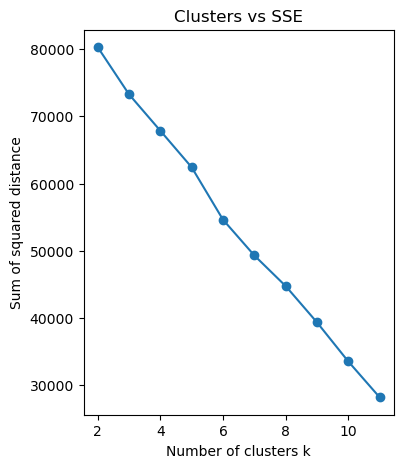

In [38]:
from sklearn.cluster import KMeans
sse = []
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_dfr1)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(4, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.title('Clusters vs SSE')

#Based on Elbow method, we can see that the curve elbows at value 5. Hence number of clusters we choose are 5

In [39]:
#Training the data using K = 5
kmeans = KMeans(5, init = 'k-means++', random_state = 0, max_iter=24)
kmeans.fit(X_scaled_dfr1)

KMeans(max_iter=24, n_clusters=5, random_state=0)

In [40]:
#Predicting the values for K means
predict = kmeans.predict(X_scaled_dfr1) 
predict

array([2, 0, 2, ..., 2, 2, 0], dtype=int32)

In [41]:
#Getting the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-1.71517563e-02, -2.59560682e-01, -2.57725459e-01,
        -1.51783609e-01, -9.32823615e-01, -1.34520277e-01,
        -4.16892224e-01,  1.25443042e-01, -6.26224291e-02,
         2.75723186e-01,  2.57611934e-01, -3.31055166e-01,
         9.77756702e-03, -8.10629569e-03, -3.34263135e-02,
        -4.52805277e-02,  4.94369864e-02],
       [ 2.00903345e-01, -1.91699424e-01, -1.98272245e-01,
        -7.81216101e-02, -1.58249988e-02,  2.99761186e-02,
        -5.75688358e-02,  2.32002380e-03, -6.26224291e-02,
         4.22433950e-02, -2.15845949e+00,  3.02064460e+00,
        -2.81220029e-01, -2.72873897e-02, -3.34263135e-02,
        -4.52805277e-02, -2.72873897e-02],
       [-2.93636714e-02,  2.48216386e-01,  2.45672607e-01,
         7.41049023e-04,  8.25453956e-01,  1.57717955e-01,
        -4.16892224e-01,  2.60088057e-02, -6.26224291e-02,
         2.63677710e-01,  2.35731462e-01, -3.31055166e-01,
         1.85302774e-02,  2.29742619e-02,  4.86659028e-02,
         5.58150813e-02, -2.7

Text(0, 0.5, 'Vehicle Damage Rating 1 - Severity')

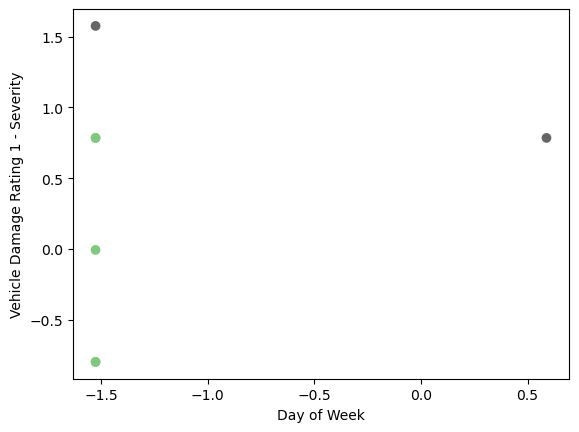

In [42]:
#Plotting the data by taking two columns randomly
%matplotlib inline
plt.scatter(X_scaled_dfr1['Day of Week'][:7], X_scaled_dfr1['Vehicle Damage Rating 1 - Severity'][:7], 
            c = model.labels_[:7], cmap = 'Accent')

plt.xlabel('Day of Week')
plt.ylabel('Vehicle Damage Rating 1 - Severity')

In [43]:
#Labels of clusters
kmeans.labels_ 

array([2, 0, 2, ..., 2, 2, 0], dtype=int32)

In [44]:
#Silhouette score for k means 
k_means_sil = silhouette_score(X_scaled_dfr1, predict)
#Printing the silhoutte score for kmeans and agglomerative clustering
k_means_sil, agglo_sil

(0.2227327256519786, 0.33262255909588984)

#As we can see we are getting more defined clusters in agglomerative clustering.The silhoutte score is 0.332

### Regression model training

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [46]:
Y.shape

(5376,)

In [47]:
X_scaled_dfr1.shape

(5376, 17)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dfr1, Y, test_size = 0.25, random_state = 0 )

#Linear Regression

In [50]:
x = X_train
y = y_train
x = sm.add_constant(x)
print(x.index)
print(y.index)
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
results = sm.OLS(y,x).fit()
results.summary()

Index([2078, 3002,  890, 5248, 1848, 2804, 3081,  847, 4794, 2200,
       ...
        705, 3468, 4373, 1033, 4859, 4931, 3264, 1653, 2607, 2732],
      dtype='int64', length=4032)
Index([2078, 3002,  890, 5248, 1848, 2804, 3081,  847, 4794, 2200,
       ...
        705, 3468, 4373, 1033, 4859, 4931, 3264, 1653, 2607, 2732],
      dtype='int64', length=4032)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.341
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           3.86e-08
Time:                        21:35:20   Log-Likelihood:                -26157.
No. Observations:                4032   AIC:                         5.235e+04
Df Residuals:                    4016   BIC:                         5.245e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        25.9751      2.543     10.213      0.000      20.989      30.962
Day of Week                                  -4.3117      2.547     -1.693      0.091      -9.306       0.682
Autonomous Level Engaged                     -0.2133     11.291     -0.019      0.985     -22.350      21.924
Autonomous Unit - Reported                    4.2965     11.275      0.381      0.703     -17.810      26.403
Vehicle Damage Rating 1 - Severity           -8.1901      2.718     -3.013      0.003     -13.520      -2.861
Person Gender                                -0.7392      2.561     -0.289      0.773      -5.760       4.282
Crash_A - SUSPECTED SERIOUS INJURY        -8.923e+12   1.58e+14     -0.056      0.955   -3.19e+14    3.01e+14
Crash_B - SUSPECTED MINOR INJURY          -2.334e+13   4.13e+14     -0.056      0.955   -8.33e+14    7.87e+14
Crash_C - POSSIBLE INJURY                 -2.255e+13   3.99e+14     -0.056      0.955   -8.05e+14     7.6e+14
Crash_K - FATAL INJURY                    -4.099e+12   7.26e+13     -0.056      0.955   -1.46e+14    1.38e+14
Crash_N - NOT INJURED                     -3.031e+13   5.37e+14     -0.056      0.955   -1.08e+15    1.02e+15
Weather_1 - CLEAR                          6.507e+13   3.09e+14      0.210      0.833   -5.42e+14    6.72e+14
Weather_2 - CLOUDY                         5.089e+13   2.42e+14      0.210      0.833   -4.24e+14    5.26e+14
Weather_3 - RAIN                           4.446e+13   2.11e+14      0.210      0.833    -3.7e+14    4.59e+14
Weather_4 - SLEET/HAIL                     4.651e+12   2.21e+13      0.210      0.833   -3.87e+13     4.8e+13
Weather_5 - SNOW                           5.696e+12   2.71e+13      0.210      0.833   -4.74e+13    5.88e+13
Weather_6 - FOG                            7.708e+12   3.67e+13      0.210      0.833   -6.42e+13    7.96e+13
Weather_98 - OTHER (EXPLAIN IN NARRATIVE)  4.651e+12   2.21e+13      0.210      0.833   -3.87e+13     4.8e+13
==============================================================================
Omnibus:                     4949.960   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           619738.666
Skew:                          -6.669   Prob(JB):                         0.00
Kurtosis:                      62.254   Cond. No.                     4.81e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
y_predict = results.predict(x)
error = y - y_predict
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

Text(0, 0.5, 'Residuals')

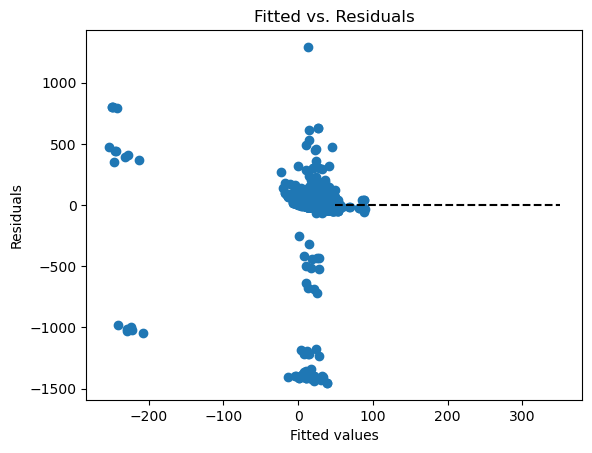

In [52]:
plt.scatter(lin['y_predict'], lin['error'])
plt.hlines(0, xmin = 50, xmax = 350, linestyles= '--', color = 'k')
plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [53]:
import scipy.stats

results = {}

max_correlation = -1  
best_column = None

for column in X_train.columns[1:]:
    correl, p_value = scipy.stats.pearsonr(X_train[column], y_train)
    results[column] = correl
    print(column, correl)

# Check if this column has a higher correlation coefficient than the current maximum
    if correl > max_correlation:
        max_correlation = correl
        best_column = column

# Print the highest correlation value and the corresponding column
print(f"The column with the highest Pearson correlation coefficient is '{best_column}' with a coefficient of {max_correlation}.")


Autonomous Level Engaged 0.01271423760897087
Autonomous Unit - Reported 0.012936458760663568
Vehicle Damage Rating 1 - Severity -0.04842880039444808
Person Gender -0.007909901556504293
Crash_A - SUSPECTED SERIOUS INJURY -0.010511916052184801
Crash_B - SUSPECTED MINOR INJURY 0.005774476278022677
Crash_C - POSSIBLE INJURY 0.017131380757926636
Crash_K - FATAL INJURY -0.10615545746608188
Crash_N - NOT INJURED 0.0008271956682916175
Weather_1 - CLEAR 0.012971651348573022
Weather_2 - CLOUDY 0.003775064038605138
Weather_3 - RAIN -0.026826382653938073
Weather_4 - SLEET/HAIL 0.006477053055909513
Weather_5 - SNOW 0.0009694830771262309
Weather_6 - FOG 0.015589017615230658
Weather_98 - OTHER (EXPLAIN IN NARRATIVE) 0.0006284906284062372
The column with the highest Pearson correlation coefficient is 'Crash_C - POSSIBLE INJURY' with a coefficient of 0.017131380757926636.


In [54]:
x = X_train['Crash_C - POSSIBLE INJURY']
y = y_train
x = sm.add_constant(x)

In [55]:
print(x.index)
print(y.index)
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

Index([2078, 3002,  890, 5248, 1848, 2804, 3081,  847, 4794, 2200,
       ...
        705, 3468, 4373, 1033, 4859, 4931, 3264, 1653, 2607, 2732],
      dtype='int64', length=4032)
Index([2078, 3002,  890, 5248, 1848, 2804, 3081,  847, 4794, 2200,
       ...
        705, 3468, 4373, 1033, 4859, 4931, 3264, 1653, 2607, 2732],
      dtype='int64', length=4032)


In [56]:
print(x.dtypes)
print(y.dtypes)

const                        float64
Crash_C - POSSIBLE INJURY    float64
dtype: object
float64


In [57]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.183
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.277
Time:                        21:35:20   Log-Likelihood:                -26188.
No. Observations:                4032   AIC:                         5.238e+04
Df Residuals:                    4030   BIC:                         5.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        25.9747      2.523     10.295      0.000      21.028      30.921
Crash_C - POSSIBLE INJURY     2.7416      2.521      1.088      0.277      -2.200       7.683
==============================================================================
Omnibus:                     5141.085   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           677131.027
Skew:                          -7.147   Prob(JB):                         0.00
Kurtosis:                      64.857   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
coefficients = results.params
print(coefficients)

const                        25.974706
Crash_C - POSSIBLE INJURY     2.741612
dtype: float64


In [59]:
y_predict = results.predict(x)
error = y - y_predict
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

In [60]:
import scipy.stats as st
x = X_scaled_dfr1["Crash_C - POSSIBLE INJURY"].values
y = Y.values
model = st.linregress(x,y)
model
y_predict = model.slope * x + model.intercept
y_mean = y.mean()

sst = ((y - y_mean)**2).sum()
ssr = ((y - y_predict)**2).sum()

#Accuracy score for statistical learning simple linear regression 
stat_sl_score = 1 - (ssr/sst)
stat_sl_score

0.0004144027148871299

In [61]:
correlation_matrix = X_train.corr()
correlation_matrix

,Day of Week,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Person Gender,Crash_A - SUSPECTED SERIOUS INJURY,Crash_B - SUSPECTED MINOR INJURY,Crash_C - POSSIBLE INJURY,Crash_K - FATAL INJURY,Crash_N - NOT INJURED,Weather_1 - CLEAR,Weather_2 - CLOUDY,Weather_3 - RAIN,Weather_4 - SLEET/HAIL,Weather_5 - SNOW,Weather_6 - FOG,Weather_98 - OTHER (EXPLAIN IN NARRATIVE)
Day of Week,1.000000,-0.000294,0.005632,0.047254,-0.016861,0.018209,0.006183,-0.020105,0.016170,0.002534,-0.102762,0.058778,0.076681,-0.027184,0.063651,-0.013181,0.020933
Autonomous Level Engaged,-0.000294,1.000000,0.974189,0.266976,-0.165300,0.026219,0.023058,0.050187,-0.000713,-0.062749,0.063781,-0.064567,-0.023899,0.006665,0.009429,0.010186,0.006665
Autonomous Unit - Reported,0.005632,0.974189,1.000000,0.271261,-0.168016,0.025930,0.027945,0.049210,-0.000928,-0.065666,0.062817,-0.069687,-0.016557,0.006618,0.009363,0.010114,0.006618
Vehicle Damage Rating 1 - Severity,0.047254,0.266976,0.271261,1.000000,-0.072400,0.061339,0.167270,0.048060,0.046146,-0.189095,-0.022914,-0.013658,0.053195,-0.007191,0.005271,-0.009401,-0.021747
Person Gender,-0.016861,-0.165300,-0.168016,-0.072400,1.000000,0.024879,-0.018111,-0.055356,0.023417,0.044454,0.003268,-0.002536,-0.003519,0.004386,-0.006866,0.022838,-0.014091
Crash_A - SUSPECTED SERIOUS INJURY,0.018209,0.026219,0.025930,0.061339,0.024879,1.000000,-0.058170,-0.055513,-0.009079,-0.209129,-0.041067,0.021211,0.038503,-0.003807,-0.005387,-0.005819,-0.003807
Crash_B - SUSPECTED MINOR INJURY,0.006183,0.023058,0.027945,0.167270,-0.018111,-0.058170,1.000000,-0.165862,-0.027127,-0.624835,-0.005631,-0.036071,0.054709,-0.011376,-0.016094,-0.000612,-0.011376
Crash_C - POSSIBLE INJURY,-0.020105,0.050187,0.049210,0.048060,-0.055356,-0.055513,-0.165862,1.000000,-0.025888,-0.596300,0.036051,0.002814,-0.057366,-0.010856,0.040837,-0.016592,-0.010856
Crash_K - FATAL INJURY,0.016170,-0.000713,-0.000928,0.046146,0.023417,-0.009079,-0.027127,-0.025888,1.000000,-0.097527,-0.020594,0.043039,-0.018081,-0.001776,-0.002512,-0.002714,-0.001776
Crash_N - NOT INJURED,0.002534,-0.062749,-0.065666,-0.189095,0.044454,-0.209129,-0.624835,-0.596300,-0.097527,1.000000,-0.007425,0.013326,-0.008284,0.018206,-0.016052,0.014920,0.018206


In [62]:
import numpy as np

#Calculate the correlation matrix using np.corrcoef
correlation_matrix = X_train.corr()

# Create a dictionary to store related columns
related_columns_dict = {}

# Find columns with correlation >= 0.75
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.75:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            # Retain the one that appears first in the dictionary order
            if col_i < col_j:
                first_col, second_col = col_i, col_j
            else:
                first_col, second_col = col_j, col_i

            if first_col in related_columns_dict:
                related_columns_dict[first_col].append(second_col)
            else:
                related_columns_dict[first_col] = [second_col]

print(related_columns_dict)

{'Autonomous Level Engaged': ['Autonomous Unit - Reported']}


In [63]:
columns = ['Autonomous Unit - Reported']
X_train.drop(columns, axis = 1, inplace = True)

In [64]:
columns = ['Autonomous Unit - Reported']
X_test.drop(columns, axis = 1, inplace = True)

In [65]:
X_train_MLR = X_train
X_train_MLR.columns

Index(['Day of Week', 'Autonomous Level Engaged',
       'Vehicle Damage Rating 1 - Severity', 'Person Gender',
       'Crash_A - SUSPECTED SERIOUS INJURY',
       'Crash_B - SUSPECTED MINOR INJURY', 'Crash_C - POSSIBLE INJURY',
       'Crash_K - FATAL INJURY', 'Crash_N - NOT INJURED', 'Weather_1 - CLEAR',
       'Weather_2 - CLOUDY', 'Weather_3 - RAIN', 'Weather_4 - SLEET/HAIL',
       'Weather_5 - SNOW', 'Weather_6 - FOG',
       'Weather_98 - OTHER (EXPLAIN IN NARRATIVE)'],
      dtype='object')

In [66]:
import statsmodels.api as sm

X = sm.add_constant(X_train_MLR)
y = y_train
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

model = sm.OLS(y, X).fit()

In [67]:
y_predict = model.predict(X)
error = y - y_predict

In [68]:
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

In [69]:
# Calculate R-squared value
r_squared_modified = model.rsquared
# Print the R-squared value rounded to two decimal places
print(round(r_squared_modified, 2))

0.02


In [70]:
from sklearn.linear_model import LinearRegression
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# 1- Instantiate the model
lreg = LinearRegression()

# 2 - Train the model using the fit function
lreg.fit(X, y)
mlr_score = lreg.score(X,y)
# 3- Predict and evaluate 
print('score:', lreg.score(X,y))

score: 0.015924350411608668


In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ypred = lreg.predict(X)
mse = mean_squared_error(y,ypred)
#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(y,ypred))

Mean Square Error:  25251.440208289478
Root Mean Square Error:  158.90701749227276
Mean Absolute Error is: 49.412877076737985


#SGD Regressor

In [72]:
from sklearn.linear_model import SGDRegressor

X, Y = X_scaled_dfr1, Y

train_score = []
index = []

# tuning the parameters to find the best params to get params which gives best train accuracy.
for max_iter in [100000, 1000000, 10000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001, 0.00001]:
        for learning_rate in ['constant', 'optimal', 'invscaling', 'adaptive']:
            sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = learning_rate, eta0 = eta0)
            sgd.fit(X, Y)
            train_score.append(sgd.score(X, Y))
            index.append((max_iter, eta0,learning_rate))

In [73]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.010523575548251451, (1000000, 0.001, 'adaptive'))

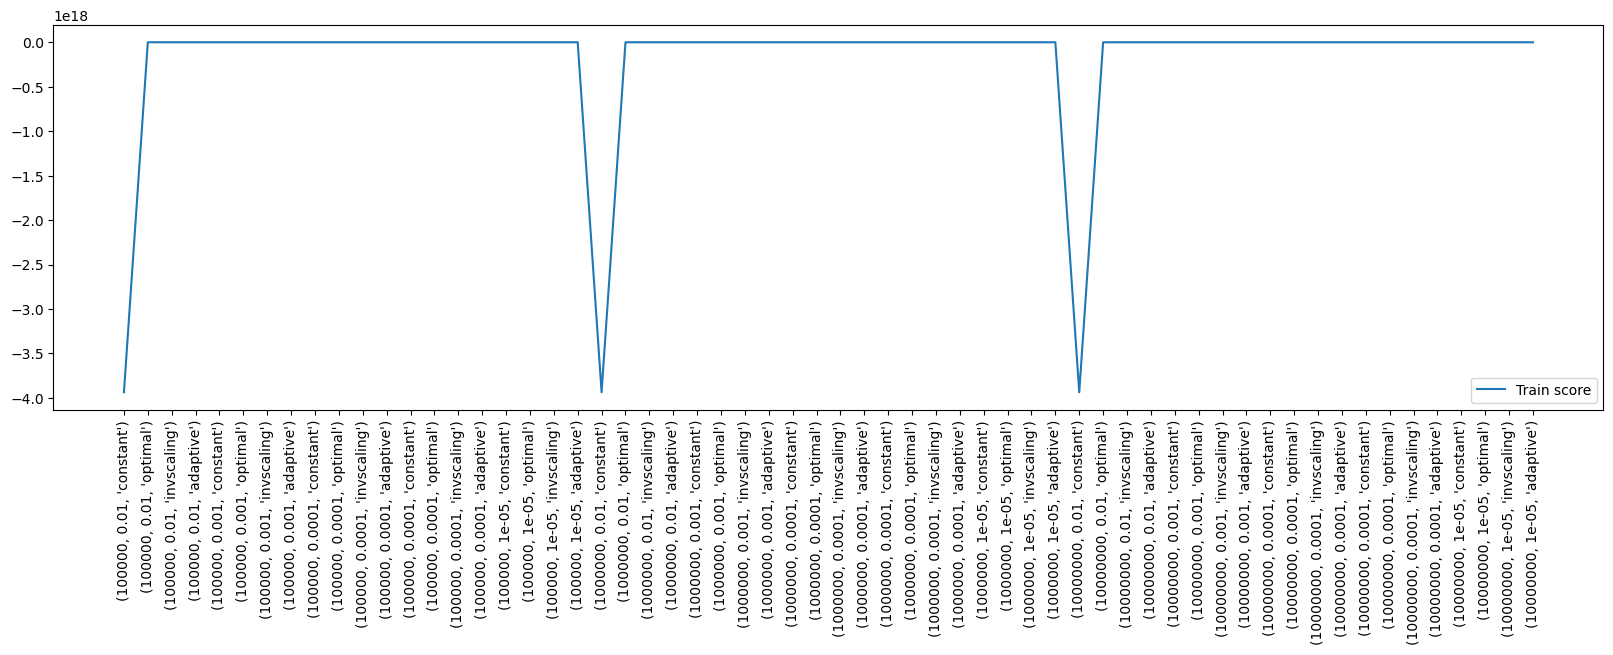

In [74]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [75]:
sgd = SGDRegressor(random_state = 0, max_iter = 1000000, learning_rate = 'adaptive', eta0 = 0.00001)
sgd.fit(X, Y)

ypred = sgd.predict(X)

mse = mean_squared_error(Y,ypred)

#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(Y,ypred))
sgd_score = sgd.score(X, Y)
print('train r2-score: ', sgd_score)
sgd.n_iter_

Mean Square Error:  23416.96376613274
Root Mean Square Error:  153.0260231664299
Mean Absolute Error is: 47.66269443644646
train r2-score:  0.010522222879688181


111

#Polynomial Regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_poly, y_poly = X_scaled_dfr1, Y

# Processing by transforming the data to polynomial form using degree as 2
poly = PolynomialFeatures(degree=2)
poly.fit(x_poly)
X_train_poly = poly.transform(x_poly)

# Performing Linear Regression analysis
lreg = LinearRegression()
lreg.fit(X_train_poly, y_poly)

# Calculating and printing the R-squared score
poly_score = lreg.score(X_train_poly, y_poly)
print('train r2-score:', poly_score)

train r2-score: 0.09093611929924517


In [77]:
train_score = []
index = []

# Tuning the params for polynomial regression to select the best params which gives high train score.
for max_iter in [10000, 100000, 1000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001]:
        for learning_rate in ['constant', 'optimal', 'invscaling', 'adaptive']:
            sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = learning_rate, eta0 = eta0)
            sgd.fit(X_train_poly, y_poly)
            train_score.append(sgd.score(X_train_poly, y_poly))
            index.append((max_iter, eta0,learning_rate))

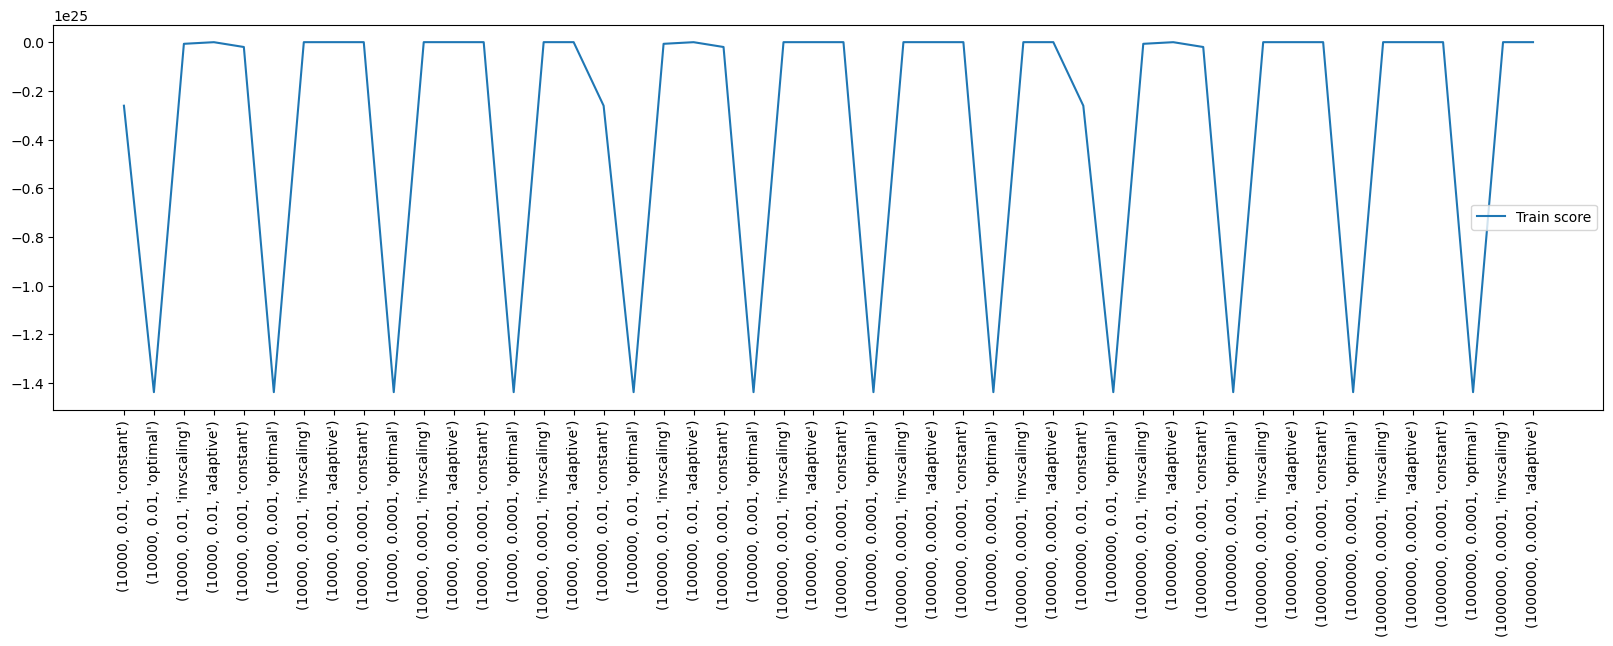

In [78]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [79]:
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(-1.6648937451721574e+17, (1000000, 0.0001, 'adaptive'))

In [80]:
sgd = SGDRegressor(random_state = 0, max_iter = 1000000, learning_rate = 'adaptive', eta0 = 0.0001)
sgd.fit(X_train_poly, y_poly)

poly_score = sgd.score(X_train_poly, y_poly)
print('train r2-score: ', poly_score)

train r2-score:  -1.6648937451721574e+17


#Decision Tree Regression 

Text(0, 0.5, 'Y')

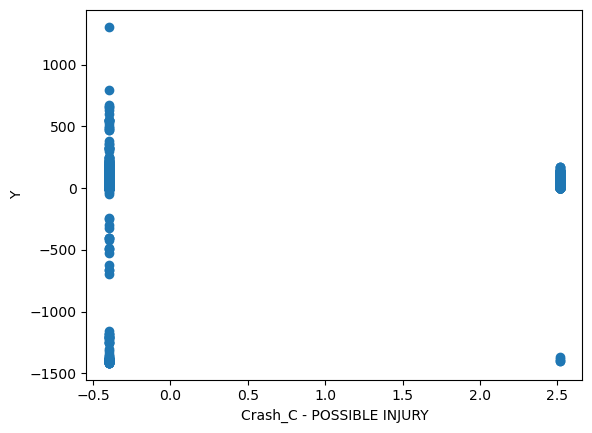

In [81]:
X_tree = X_scaled_dfr1
y_tree = Y
%matplotlib inline
#roc curve
#decision tree

plt.scatter(X_scaled_dfr1['Crash_C - POSSIBLE INJURY'], y_tree)
plt.xlabel('Crash_C - POSSIBLE INJURY')
plt.ylabel('Y')

In [82]:
from sklearn.tree import DecisionTreeRegressor

# processing Decision Tree regression
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_tree['Crash_C - POSSIBLE INJURY'].values.reshape(-1,1), y_tree.values)

DecisionTreeRegressor(random_state=0)

In [83]:
from sklearn import tree 

# plotting decision tree for our model data
plt.subplots(figsize = (200,100))
tree.plot_tree(dt, 
               feature_names=['Crash_C - POSSIBLE INJURY'],  
               filled=True,
               rounded = True)
plt.show()

In [84]:
vals = [0.5, 1.5, 2.5, 3.5]

#Getting mean and rss (residual sum of squares) for analyzing the split of data in left split and right split
rss1 = []
rss2 = []
for val in vals:
    mean = dfr1[dfr1['Crash_C - POSSIBLE INJURY'] < val]['y'].mean()
    rss = ((dfr1[dfr1['Crash_C - POSSIBLE INJURY'] < val]['y'].mean() - mean)** 2).sum()
    rss1.append(rss)
    mean = dfr1[dfr1['Crash_C - POSSIBLE INJURY'] >= val]['y'].mean()
    rss = ((dfr1[dfr1['Crash_C - POSSIBLE INJURY'] >= val]['y']- mean)** 2).sum()
    rss2.append(rss)

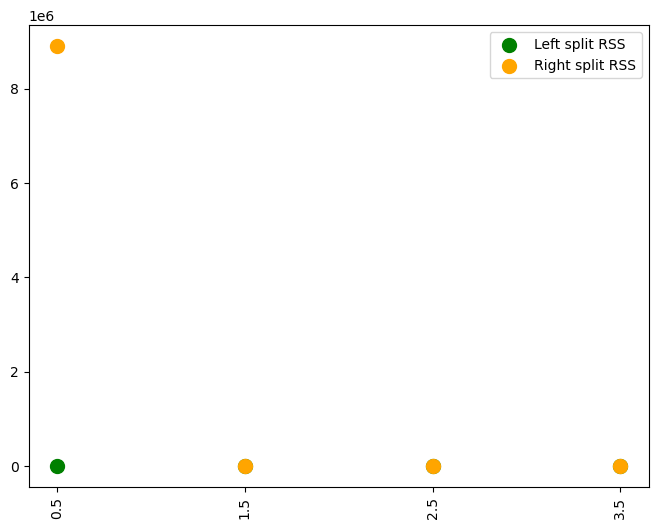

In [85]:
%matplotlib inline

# plotting the scatter plot for above rss scores, to know the left and right split
plt.subplots(figsize = (8, 6))
plt.scatter(vals, rss1, label = 'Left split RSS', s= 100, c = 'g')
plt.scatter(vals, rss2, label = 'Right split RSS', s = 100, c = 'orange')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [86]:
rss1 = np.array(rss1)
rss2 = np.array(rss2)

cost = []
index = 0
for val in vals:
    left = X_scaled_dfr1[X_scaled_dfr1['Crash_C - POSSIBLE INJURY'] < val].shape[0]/dfr1.shape[0]
    right = X_scaled_dfr1[X_scaled_dfr1['Crash_C - POSSIBLE INJURY'] >= val].shape[0]/dfr1.shape[0]
    cost.append(left*rss1[index] + right*rss2[index])
    index += 1

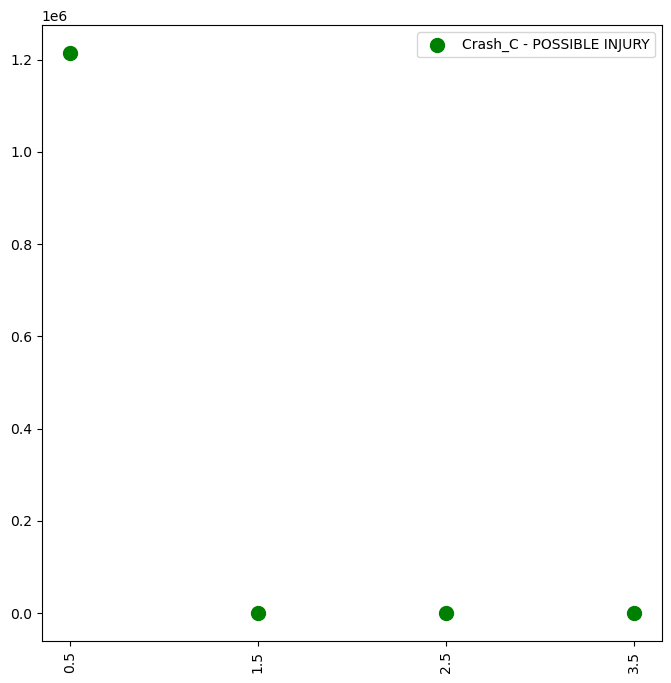

In [87]:
%matplotlib inline

plt.subplots(figsize = (8, 8))
plt.scatter(vals, cost, label = 'Crash_C - POSSIBLE INJURY', s= 100, c = 'g')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [88]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

# scaling our data using standard scaling
scaler = StandardScaler()
scaler.fit(X_tree)
X_train = scaler.transform(X_tree)
dtreg = DecisionTreeRegressor(random_state= 0)
dtreg.fit(X_tree, y_tree)
dtreg_score = dtreg.score(X_tree, y_tree)
print('Train r2-score:', dtreg_score  )

Train r2-score: 0.35767715770936037


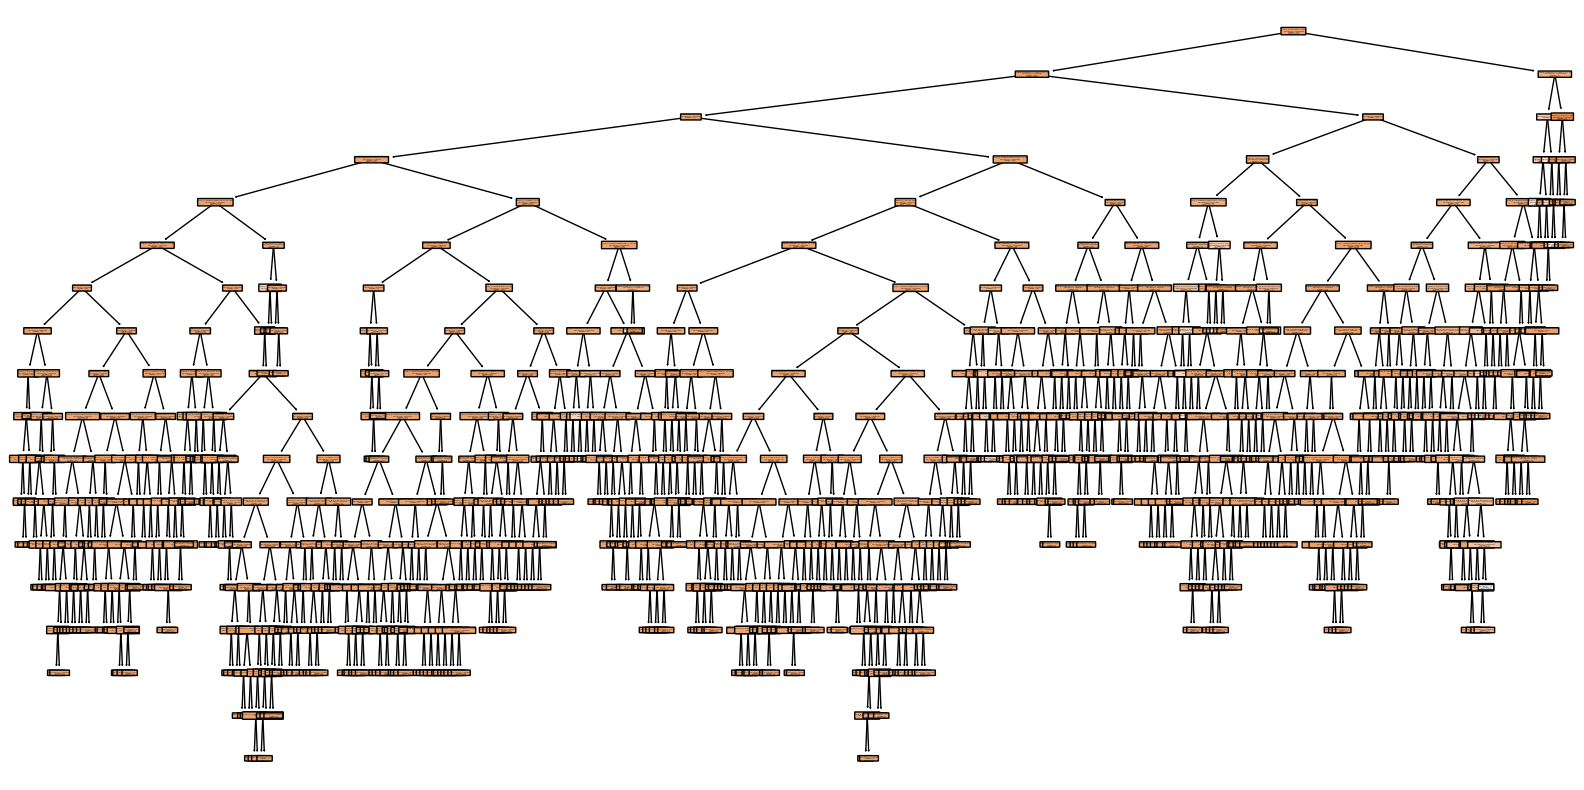

In [89]:
# plotting the decision tree, for our above model
plt.subplots(figsize = (20, 10))
plot_tree(dtreg, 
               feature_names=X_tree.columns,  
              
               filled=True,
               rounded = True)
plt.show()

In [90]:
train_scores = []
index = []

# Tuning the params to get best params, for getting better train score.
# min_samples_split, max_depth, min_impurity_decrease
for smpl_split in list(range(20, 40)):
    for  max_dpth in list(range(2,10)):
        for min_imp_dec in [0.01, 0.001, 0.0001]:
            dt = DecisionTreeRegressor(random_state = 0, min_samples_split= smpl_split, max_depth = max_dpth, min_impurity_decrease= min_imp_dec)
            dt.fit(X_train, y_tree)
            train_scores.append(dt.score(X_train, y_tree))
            index.append([smpl_split, max_dpth, min_imp_dec])

In [91]:
# getting highest train score value and index of it.
train_scores[np.argsort(train_scores)[-1]], index[np.argsort(train_scores)[-1]]

(0.13816749524158434, [20, 9, 0.01])

In [92]:
# processing with above params for our decision tree model.
dt = DecisionTreeRegressor(random_state = 0, min_samples_split = 20, max_depth = 9, min_impurity_decrease = 0.01)
dt.fit(X_train, y_tree)
dt_score = dt.score(X_train, y_tree)
print("Accuracy on training set: {:.3f}".format(dt_score))

Accuracy on training set: 0.138


#Bagging Regression

In [93]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

X = dfr1.drop('y', axis = 1)
y = dfr1['y']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# processing the bagging regressor with below params. 
dt_model = DecisionTreeRegressor(random_state = 0)
bag_reg_model = BaggingRegressor(dt_model, 
                                max_features=1.0,
                                n_estimators=5, 
                                bootstrap=True, 
                                random_state=0)
bag_reg_model.fit(X_scaled, y)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 n_estimators=5, random_state=0)

In [94]:
bag_reg_score = bag_reg_model.score(X_scaled, y)
print('Train score: ', bag_reg_score)

Train score:  0.29576735096539086


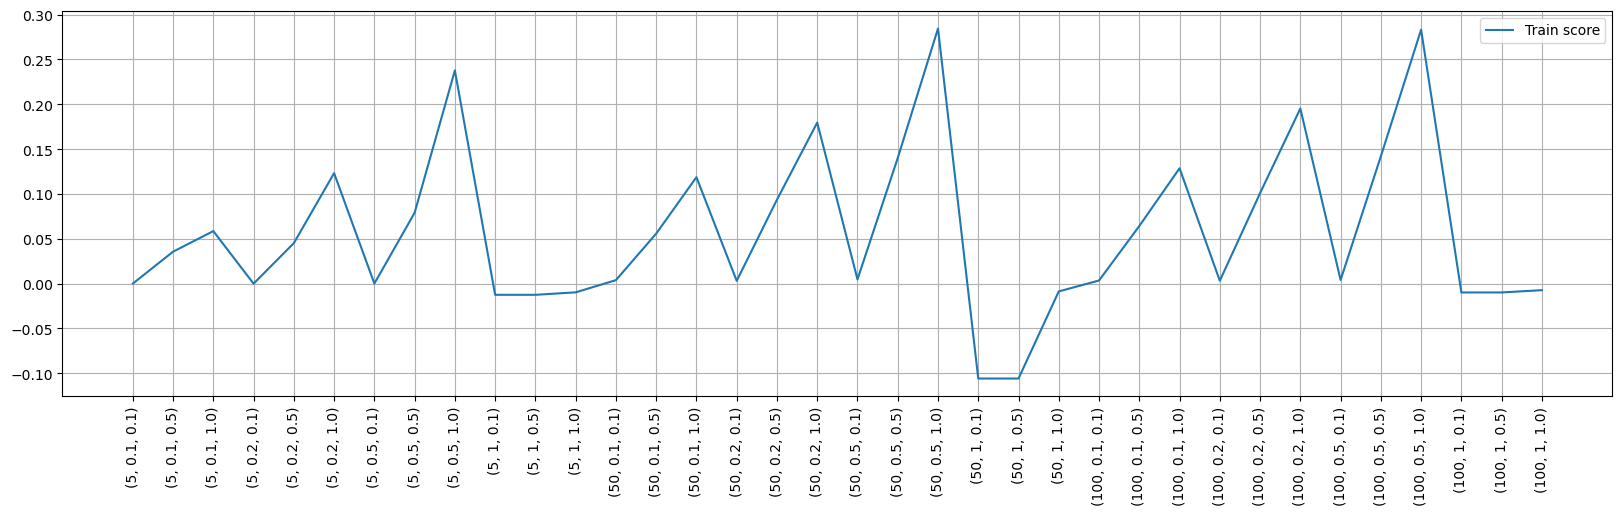

In [95]:
train_score = []
test_score = []
index = []

# Tuning the params with bagging regressor and decision tree model for better train score
for n_estimators in [5, 50, 100]:    
    for max_samples in [0.1, 0.2, 0.5, 1]:
        for max_features in [0.1, 0.5, 1.0]:
            dt_model = DecisionTreeRegressor(random_state = 0)
            bag_dt_model = BaggingRegressor(dt_model, 
                                max_features = max_features, 
                                n_estimators = n_estimators, 
                                max_samples = max_samples,
                                bootstrap = True, 
                                random_state=0)
            bag_dt_model.fit(X_scaled, y)
            train_score.append(bag_dt_model.score(X_scaled, y))
            index.append((n_estimators,
                          max_samples, max_features))

%matplotlib inline

# plotting the train score for above tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [96]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.2844570668484686, (50, 0.5, 1.0))

In [97]:
# processing and performing or training our model with above tuning params
dt_model = DecisionTreeRegressor(random_state = 0)
bag_dt_model = BaggingRegressor(dt_model, 
                                max_samples=0.5,
                                max_features=1.0, 
                                n_estimators=50, 
                                bootstrap=True, 
                                random_state=0)
bag_dt_model.fit(X_scaled, y)
bagg_dt_score = bag_dt_model.score(X_scaled, y)
print('Train score: ', bagg_dt_score)

Train score:  0.2844570668484686


#Random Forest Regression

In [98]:
from sklearn.ensemble import RandomForestRegressor

# processing random forest with max depth 1 
rfr = RandomForestRegressor(max_depth = 1, random_state=0)
rfr.fit(X_scaled, y)

print('Train score: ', rfr.score(X_scaled, y))

Train score:  0.00984592592410205


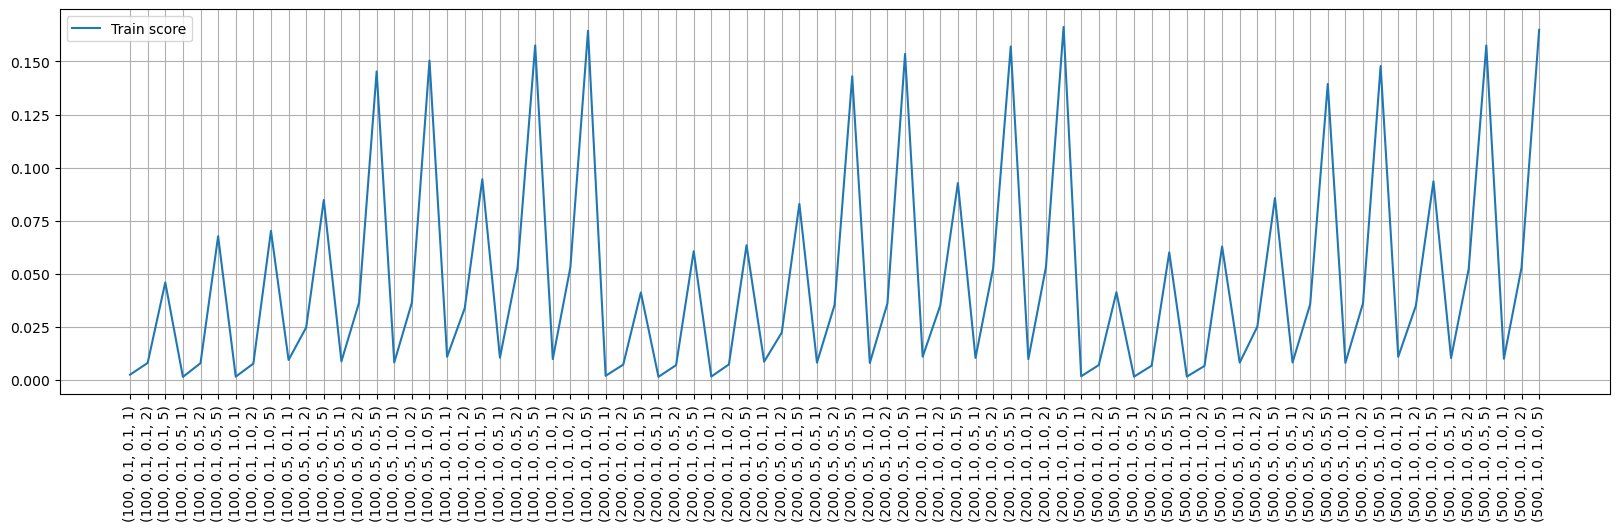

In [99]:
train = []
test = []
index = []

# Tuning the params for our model for get better accuracy
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5]:
                rfr = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                rfr.fit(X_scaled, y)
                train.append(rfr.score(X_scaled, y))
                index.append((n_estimators, max_features, 
                              max_samples, max_depth))
                
%matplotlib inline

# plotting the train scores for various tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [100]:
# getting highest train score value and index of it.
train[np.argsort(train)[-1]], index[np.argsort(train)[-1]]

(0.1662886408436557, (200, 1.0, 1.0, 5))

In [101]:
# Training our random forest regressor model with above tuning params
rfr = RandomForestRegressor(random_state= 0, n_estimators = 200, max_samples= 1.0, 
                            max_features= 1.0, max_depth= 5)
rfr.fit(X_scaled, y)

rf_score = rfr.score(X_scaled, y)
print('Train score: ', rf_score)

Train score:  0.1662886408436557


In [102]:
model_scores = [stat_sl_score,
                mlr_score,
                sgd_score,
                poly_score,
                dt_score,
                bagg_dt_score,
                rf_score]

model_names = ["simple linear regression",
               "multiple linear regression",  
               "SGD regression", "polynomial regression", 
               "Decision Tree regression", "Bagging regression", "Random Forest Regression"]

for name, score in zip(model_names, model_scores):
    print(f"{name}: {score}")

simple linear regression: 0.0004144027148871299
multiple linear regression: 0.015924350411608668
SGD regression: 0.010522222879688181
polynomial regression: -1.6648937451721574e+17
Decision Tree regression: 0.13816749524158434
Bagging regression: 0.2844570668484686
Random Forest Regression: 0.1662886408436557


#Bagging Regression model has highest train score of 28%

### Regression prediction

In [103]:
#Bagging Regression Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_test = X_scaled_dfr2

# Predicting the test data
ytest_predict = bag_reg_model.predict(X_test)

# Updating the DataFrame with predicted values for the test data
dfr2["y"] = ytest_predict

# Predicting on the training data
ytrain_predict = bag_reg_model.predict(X_scaled)

# Calculating and printing Mean Absolute Error on the training data
mae_train = mean_absolute_error(y, ytrain_predict)
print('Mean Absolute Error on Training Data:', mae_train)

accuracy_score = bag_reg_model.score(X_scaled,y)*100
print('accuracy score:', accuracy_score) 

Mean Absolute Error on Training Data: 43.203414366471094
accuracy score: 29.576735096539085


In [104]:
ytrain_predict

array([38.73442368, 32.57961538, 61.13005051, ..., 18.69075266,
       38.73442368, 32.08132368])

#Bagging Regression Model has higher train score than the other models for training data

# Classification

### Data preparation

In [105]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn 
import sklearn.metrics

import warnings
warnings.filterwarnings("ignore")

In [106]:
#read dataset into jupyter 
class_train = pd.read_csv("/Users/motlapranithareddy/Downloads/Classification_train.csv")

#create a dataframe out of the dataset for train
dfc1 = pd.DataFrame(class_train)
dfc1.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
3,3,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False


In [107]:
class_test = pd.read_csv("/Users/motlapranithareddy/Downloads/Classification_test.csv")
#create a dataframe out of the dataset for test
dfc2 = pd.DataFrame(class_test)
dfc2.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,3,65.500,3,60.0,30,1383.375000,0.014141,0.039394,43.207569,0.0,Nov,2,2,1,1,Returning_Visitor,False
1,1,1,45.000,0,0.0,10,413.000000,0.000000,0.009091,0.000000,0.0,Mar,2,4,1,1,Returning_Visitor,True
2,2,4,598.375,0,0.0,126,4446.303175,0.001538,0.015568,3.333836,0.0,Dec,2,2,3,2,Returning_Visitor,False
3,3,0,0.000,0,0.0,77,3733.228571,0.018667,0.048622,0.000000,0.8,May,2,2,1,2,Returning_Visitor,False
4,4,3,39.200,0,0.0,12,209.000000,0.000000,0.020000,0.000000,0.0,Sep,2,5,6,2,Returning_Visitor,False


In [108]:
dfc1.isna().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [109]:
dfc2.isna().sum()

Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [110]:
#dropping unnecesssary columns
dfc1 = dfc1.drop(columns=['Unnamed: 0']) 
dfc2 = dfc2.drop(columns=['Unnamed: 0']) 

In [111]:
#checking for the object datatype in datasets
dfc1.describe(include=['O'])
dfc2.describe(include=['O'])

,Month,VisitorType
count,1572,1572
unique,10,3
top,May,Returning_Visitor
freq,427,1371


In [112]:
dfc1['Month'].value_counts()
dfc2['Month'].value_counts()

Month
May     427
Nov     400
Mar     230
Dec     204
Oct      72
Sep      64
Aug      56
Jul      51
June     43
Feb      25
Name: count, dtype: int64

In [113]:
#Mapping the Month column
dfc1['Month'] = dfc1['Month'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
dfc1.info()
dfc2['Month'] = dfc2['Month'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8909 non-null   int64  
 1   Administrative_Duration  8909 non-null   float64
 2   Informational            8909 non-null   int64  
 3   Informational_Duration   8909 non-null   float64
 4   ProductRelated           8909 non-null   int64  
 5   ProductRelated_Duration  8909 non-null   float64
 6   BounceRates              8909 non-null   float64
 7   ExitRates                8909 non-null   float64
 8   PageValues               8909 non-null   float64
 9   SpecialDay               8909 non-null   float64
 10  Month                    8909 non-null   int64  
 11  OperatingSystems         8909 non-null   int64  
 12  Browser                  8909 non-null   int64  
 13  Region                   8909 non-null   int64  
 14  TrafficType             

In [114]:
dfc1['VisitorType'].value_counts()
dfc2['VisitorType'].value_counts()

VisitorType
Returning_Visitor    1371
New_Visitor           187
Other                  14
Name: count, dtype: int64

In [115]:
#one hot vector for visitor type column
cols = pd.get_dummies(dfc1['VisitorType'])
dfc1[cols.columns] = cols
dfc1.drop('VisitorType', axis = 1, inplace = True)
dfc1.info()
cols = pd.get_dummies(dfc2['VisitorType'])
dfc2[cols.columns] = cols
dfc2.drop('VisitorType', axis = 1, inplace = True)
dfc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8909 entries, 0 to 8908
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8909 non-null   int64  
 1   Administrative_Duration  8909 non-null   float64
 2   Informational            8909 non-null   int64  
 3   Informational_Duration   8909 non-null   float64
 4   ProductRelated           8909 non-null   int64  
 5   ProductRelated_Duration  8909 non-null   float64
 6   BounceRates              8909 non-null   float64
 7   ExitRates                8909 non-null   float64
 8   PageValues               8909 non-null   float64
 9   SpecialDay               8909 non-null   float64
 10  Month                    8909 non-null   int64  
 11  OperatingSystems         8909 non-null   int64  
 12  Browser                  8909 non-null   int64  
 13  Region                   8909 non-null   int64  
 14  TrafficType             

#Clustering for Classification

In [116]:
#Clustering for training data
X = dfc1.drop(['Revenue'], axis = 1)
y = dfc1['Revenue']

In [117]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated',
                     'ProductRelated_Duration', 'BounceRates','ExitRates','PageValues', 'SpecialDay','Month', 
                     'OperatingSystems', 'Browser', 'Region','TrafficType']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Agglomerative Clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

cluster_range = range(2,10)

for i in cluster_range:
    agg_cluster = AgglomerativeClustering(n_clusters=i,distance_threshold=None)
    
    agg_cluster_labels = agg_cluster.fit_predict(X_scaled)

    silhouette_avgerage = silhouette_score(X_scaled, agg_cluster_labels)

    print( 'cluster :' ,i,'silhouette_score:', round(silhouette_avgerage,2))

cluster : 2 silhouette_score: 0.4
cluster : 3 silhouette_score: 0.33
cluster : 4 silhouette_score: 0.36
cluster : 5 silhouette_score: 0.26
cluster : 6 silhouette_score: 0.29
cluster : 7 silhouette_score: 0.29
cluster : 8 silhouette_score: 0.29
cluster : 9 silhouette_score: 0.29


#Kmeans Clustering

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_range = range(2,10)

for i in cluster_range:
   
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)

    # Fit KMeans to the data and get cluster labels
    kmeans_labels = kmeans.fit_predict(X_scaled)  
    # Calculate the silhouette score
    silhouette_avgerage = silhouette_score(X_scaled, kmeans_labels)

    print( 'cluster :' ,i,'silhouette_score:', round(silhouette_avgerage,2))

cluster : 2 silhouette_score: 0.41
cluster : 3 silhouette_score: 0.35
cluster : 4 silhouette_score: 0.37
cluster : 5 silhouette_score: 0.3
cluster : 6 silhouette_score: 0.3
cluster : 7 silhouette_score: 0.3
cluster : 8 silhouette_score: 0.29
cluster : 9 silhouette_score: 0.3


In [120]:
#We are getting the highest silhoutte score for 2nd cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Cluster data using KMeans
dfc1['k_Cluster'] = kmeans.fit_predict(X_scaled)

#Kmeans cluster has the highest silhoutte score compared to agglomerative i.e, 0.41

### Classification model training

#Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8832772166105499


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Display confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("classification report:")
print(class_report)

Confusion Matrix:
[[1506   22]
 [ 186   68]]
classification report:
              precision    recall  f1-score   support

       False       0.89      0.99      0.94      1528
        True       0.76      0.27      0.40       254

    accuracy                           0.88      1782
   macro avg       0.82      0.63      0.67      1782
weighted avg       0.87      0.88      0.86      1782



#Decision Tree Classifier for Training data

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
decisionTree = DecisionTreeClassifier()

# Fit the model to the training data
decisionTree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decisionTree.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8569023569023569


In [124]:
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Display confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("classification report:")
print(class_report)

Confusion Matrix:
[[1384  144]
 [ 111  143]]
classification report:
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      1528
        True       0.50      0.56      0.53       254

    accuracy                           0.86      1782
   macro avg       0.71      0.73      0.72      1782
weighted avg       0.86      0.86      0.86      1782



#K nearest Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier


X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
KNN = KNeighborsClassifier()
# Fit the model to the training data
KNN.fit(X_train, y_train)

y_pred_rc = KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rc)
print("Accuracy:", accuracy)

Accuracy: 0.8641975308641975


#Random Forest Classifier  for Training data

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
RandomForest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Fit the model to the training data
RandomForest.fit(X_train, y_train)

y_pred_rc = RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rc)
print("Accuracy:", accuracy)

Accuracy: 0.8995510662177328


#Scaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_X_scaled = scaler.fit_transform(dfc2)
new_X_scaled = scaler.transform(dfc2)
X_scaled1 = pd.DataFrame(new_X_scaled, columns=dfc2.columns)

#Based on the accuracy scores achieved in all the above classification models,
#Random Forest classifier serves as the best model as it has the highest accuracy score.

#Hyperparameter tuning

In [128]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Define the hyperparameter grid to search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }

# # Create a decision tree classifier object
# dtc = DecisionTreeClassifier()

# # Create a GridSearchCV object with 5-fold cross-validation
# grid_search = GridSearchCV(dtc, param_grid, cv=5)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Make predictions on the test data using the best model
# best_dtc = grid_search.best_estimator_
# y_pred = best_dtc.predict(X_test)

# # Evaluate the model performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [129]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Define the hyperparameter grid to search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }

# # Create a decision tree classifier object
# rfc = RandomForestClassifier()

# # Create a GridSearchCV object with 5-fold cross-validation
# grid_search = GridSearchCV(dtc, param_grid, cv=5)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Make predictions on the test data using the best model
# best_rfc = grid_search.best_estimator_
# y_pred = best_rfc.predict(X_test)

# # Evaluate the model performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Additional metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

#As hyperparameter tuning is not predicting the true values, we have proceeded without hyperparameter tuning

# Scaling of test data

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
RandomForest = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_leaf=2,random_state=42)
RandomForest.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = RandomForest.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9006734006734006
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      1528
        True       0.77      0.43      0.55       254

    accuracy                           0.90      1782
   macro avg       0.84      0.71      0.75      1782
weighted avg       0.89      0.90      0.89      1782



Accuracy for test dataset is : 0.90

### Classification prediction

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



RandomForest = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_leaf=2,random_state=42)
# Fit the model to the training data
RandomForest.fit(X_train, y_train)

y_pred_rc = RandomForest.predict(X_scaled1)

In [132]:
dfc2['Revenue_test']=y_pred_rc

In [133]:
dfc2['Revenue_test'].value_counts()

Revenue_test
False    1430
True      142
Name: count, dtype: int64

#Compared to other classification models, we got high accuracy for Random forest Classifier